In [1]:
import os
import warnings
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import deepxde as dde
from deepxde.backend import tf

2024-12-04 22:53:00.992368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



Compiling model...
Building feed-forward neural network...
'build' took 0.023667 s

'compile' took 0.178728 s

INFO:tensorflow:Restoring parameters from model-20017.ckpt
Training model...



2024-12-04 22:53:04.175275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-12-04 22:53:04.280272: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_3/bias/Adam_1/Assign' id:798 op device:{requested: '', assigned: ''} def:{{{node dense_3/bias/Adam_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_3/bias/Adam_1, dense_3/bias/Adam_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Step      Train loss                        Test loss                         Test metric
0         [2.16e-01, 2.46e-01, 7.44e-01]    [2.16e-01, 2.46e-01, 7.44e-01]    []  
1000      [4.71e-02, 9.00e-03, 2.02e-01]    [4.71e-02, 9.00e-03, 2.02e-01]    []  
2000      [6.49e-02, 2.95e-03, 1.31e-01]    [6.49e-02, 2.95e-03, 1.31e-01]    []  
3000      [6.27e-02, 1.46e-03, 1.10e-01]    [6.27e-02, 1.46e-03, 1.10e-01]    []  
4000      [5.57e-02, 5.89e-04, 9.05e-02]    [5.57e-02, 5.89e-04, 9.05e-02]    []  
5000      [4.25e-02, 5.46e-04, 6.41e-02]    [4.25e-02, 5.46e-04, 6.41e-02]    []  
6000      [3.37e-02, 5.85e-04, 4.77e-02]    [3.37e-02, 5.85e-04, 4.77e-02]    []  
7000      [2.51e-02, 6.92e-04, 3.02e-02]    [2.51e-02, 6.92e-04, 3.02e-02]    []  
8000      [2.07e-02, 5.63e-04, 2.18e-02]    [2.07e-02, 5.63e-04, 2.18e-02]    []  
9000      [1.89e-02, 4.63e-04, 1.77e-02]    [1.89e-02, 4.63e-04, 1.77e-02]    []  
10000     [1.75e-02, 3.74e-04, 1.56e-02]    [1.75e-02, 3.74e-04, 1.56e-02]    []

2024-12-04 22:53:24.434386: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_3/bias/Adam_3/Assign' id:1972 op device:{requested: '', assigned: ''} def:{{{node dense_3/bias/Adam_3/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_3/bias/Adam_3, dense_3/bias/Adam_3/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


11000     [1.73e-02, 3.26e-04, 1.50e-02]    [1.72e-02, 3.26e-04, 1.50e-02]    []  
12000     [2.87e-02, 2.70e-04, 1.46e-02]    [2.87e-02, 2.70e-04, 1.46e-02]    []  
13000     [1.48e-02, 2.51e-04, 1.29e-02]    [1.48e-02, 2.51e-04, 1.29e-02]    []  
14000     [1.41e-02, 2.51e-04, 1.17e-02]    [1.41e-02, 2.51e-04, 1.17e-02]    []  
15000     [1.30e-02, 2.07e-04, 1.09e-02]    [1.30e-02, 2.07e-04, 1.09e-02]    []  
16000     [1.18e-02, 2.18e-04, 9.97e-03]    [1.18e-02, 2.18e-04, 9.97e-03]    []  
17000     [1.10e-02, 2.13e-04, 9.07e-03]    [1.09e-02, 2.13e-04, 9.07e-03]    []  
18000     [1.02e-02, 2.24e-04, 8.18e-03]    [1.02e-02, 2.24e-04, 8.18e-03]    []  
19000     [9.42e-03, 1.99e-04, 7.45e-03]    [9.39e-03, 1.99e-04, 7.45e-03]    []  
20000     [8.79e-03, 1.74e-04, 6.80e-03]    [8.76e-03, 1.74e-04, 6.80e-03]    []  
20016     [8.79e-03, 1.76e-04, 6.78e-03]    [8.75e-03, 1.76e-04, 6.78e-03]    []  

Best model at step 20016:
  train loss: 1.57e-02
  test loss: 1.57e-02
  test metric: 

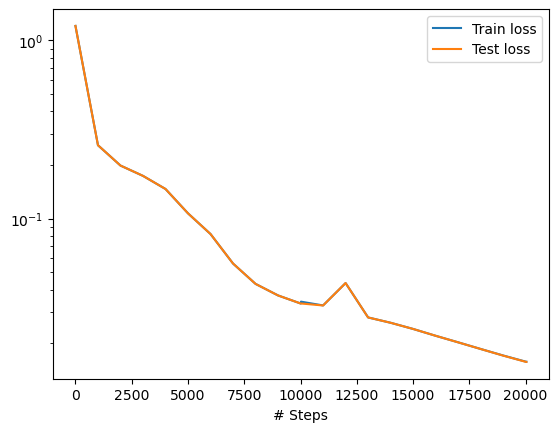

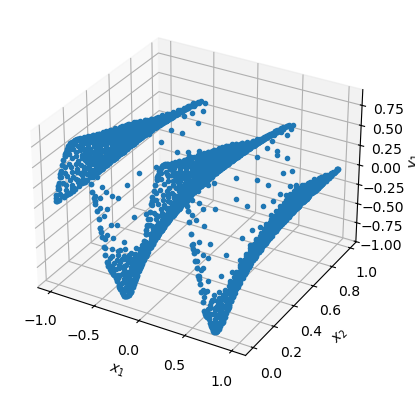

AttributeError: 'NoneType' object has no attribute 'restore'

In [ ]:
def gen_testdata():
    data = np.load("Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y


def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Reinitialize the PDE data with new boundary conditions
new_bc = dde.icbc.DirichletBC(geomtime, lambda x: np.sin(np.pi * x[:, 0:1]), 
                              lambda _, on_boundary: on_boundary)
new_ic = dde.icbc.IC(
    geomtime, lambda x: np.sin(2 * np.pi * x[:, 0:1]), 
    lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [new_bc, new_ic], num_domain=2500, num_boundary=100, num_initial=160
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=1.0e-3)
model.restore('model-20017.ckpt')  # Load the pre-trained model
model.train(iterations=10000)
model.compile("L-BFGS")
model.train()

X = geomtime.random_points(100000)
err = 1
f = model.predict(X, operator=pde)
err_eq = np.absolute(f)
err = np.mean(err_eq)
print("Mean residual: %.3e" % (err))

x_id = np.argmax(err_eq)
print("Adding new point:", X[x_id], "\n")
data.add_anchors(X[x_id])
early_stopping = dde.callbacks.EarlyStopping(min_delta=1e-4, patience=2000)
model.compile("adam", lr=1e-3)
model.train(iterations=10000, disregard_previous_best=True, callbacks=[early_stopping], model_save_path='model')
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X, y_true = gen_testdata()
y_pred = model.predict(X)
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))